In [1]:
import sys
import numpy
import pandas
import seaborn
import matplotlib
import scipy
import sklearn


In [2]:
print('Python:{}'.format(sys.version))

Python:3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [3]:
print('Python:{}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))
print('Pandas:{}'.format(pandas.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))
print('Seaborn:{}'.format(seaborn.__version__))
print('Scipy:{}'.format(scipy.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

Python:3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Numpy:1.19.4
Pandas:1.0.5
Matplotlib:3.2.2
Seaborn:0.10.1
Scipy:1.5.0
Sklearn:0.23.1


In [4]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load dataset from the csv file using pandas
data = pd.read_csv('test.csv')

In [6]:
#explore dataset
print(data.columns)

Index(['id', 'amount_value', 'amount_currency', 'channel',
       'deviceDetails_browser', 'deviceDetails_device',
       'deviceDetails_deviceIp', 'merchantRefTransactionId',
       'paymentMethod_apmType', 'paymentMethod_cardNumber',
       'paymentMethod_cardType', 'paymentMethod_cardSubType',
       'paymentMethod_cvv', 'paymentMethod_encodedPaymentToken',
       'paymentMethod_expiryMonth', 'paymentMethod_expiryYear',
       'transaction_time', 'class'],
      dtype='object')


In [7]:
print(data.shape)

(10000, 18)


In [8]:
print(data.describe())

                id  amount_value  merchantRefTransactionId  paymentMethod_cvv  \
count  10000.00000  10000.000000              1.000000e+04       10000.000000   
mean    4999.50000  49787.950879              4.955631e+09         501.599900   
std     2886.89568  29058.107901              2.878783e+09         289.530304   
min        0.00000      4.390000              2.443220e+05           0.000000   
25%     2499.75000  24259.970000              2.447359e+09         249.000000   
50%     4999.50000  49616.385000              4.970285e+09         502.000000   
75%     7499.25000  74916.525000              7.406847e+09         753.000000   
max     9999.00000  99967.920000              9.998277e+09         999.000000   

       paymentMethod_expiryMonth  paymentMethod_expiryYear         class  
count               10000.000000              10000.000000  10000.000000  
mean                    5.535500               2022.978100      0.504700  
std                     3.438651             

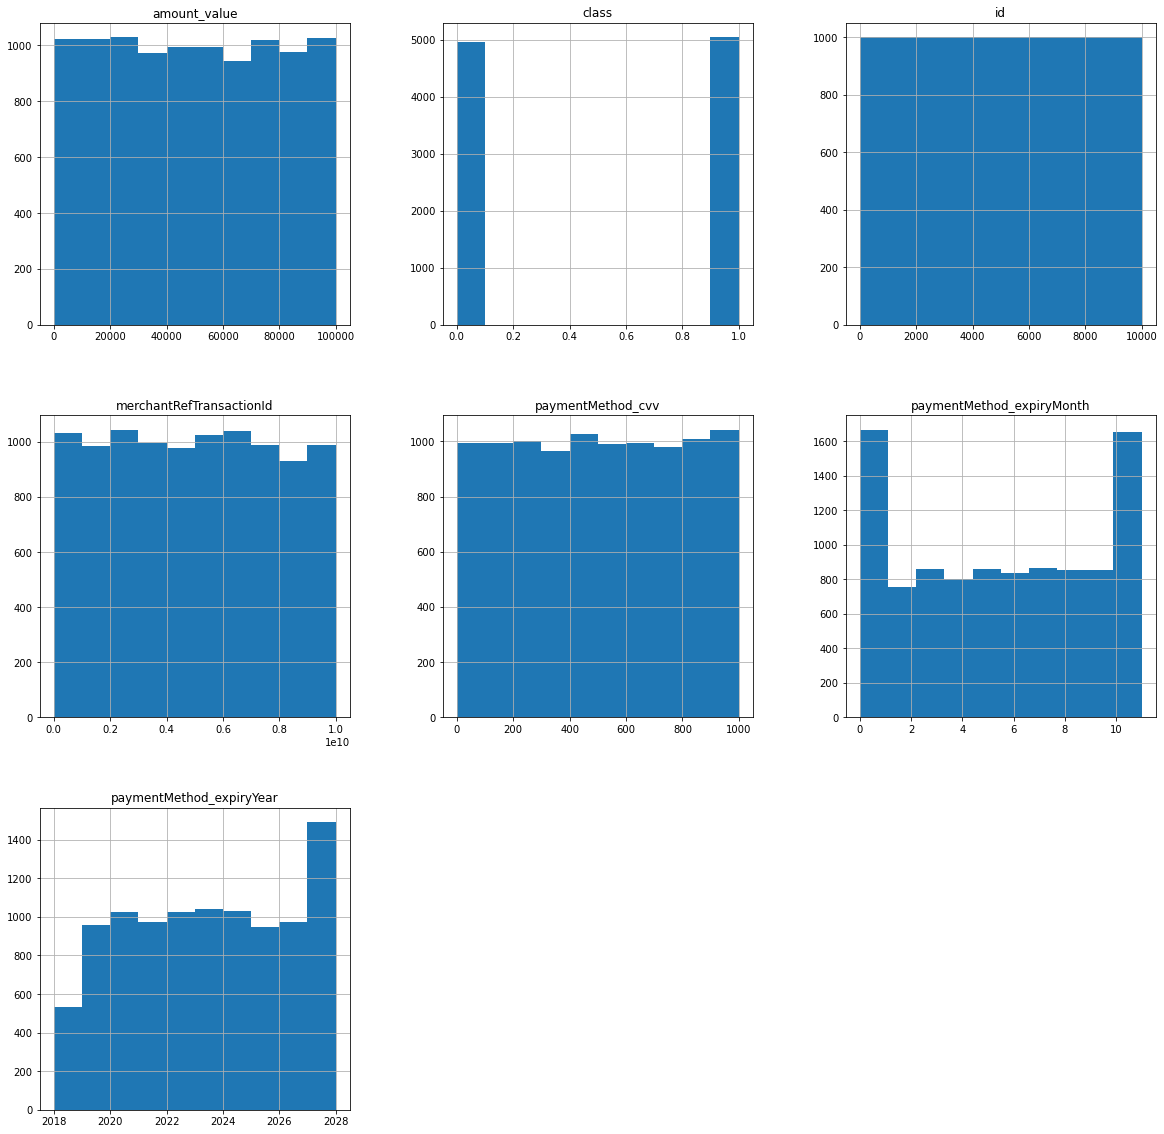

In [9]:
#Plot histogram of each paramater
data.hist(figsize = (20,20))
plt.show()

In [10]:
#Determinate number of fraud cases in dataset
Fraud = data[data['class'] == 1]
Valid = data[data['class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

1.0189783969311528
Fraud Cases: 5047
Valid Cases: 4953


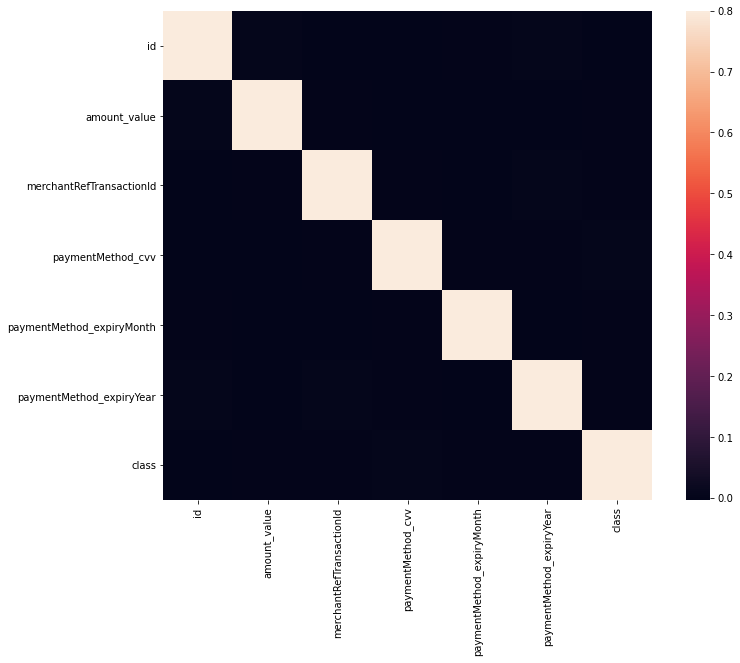

In [11]:
#Corelation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:
#Get all columns from DataFrame
columns = data.columns.tolist()

#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["class"]]

#Store variable we'll be predicting an
target = "class"

X = data[columns]
Y = data[target]

#Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(100000, 17)
(100000,)


In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

#define outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 16,
    contamination = outlier_fraction)
}

In [29]:
#Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Resape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification matrix
    print('{}: ()'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))
    

ValueError: could not convert string to float: 'USD'